In [6]:
import warnings
warnings.filterwarnings('ignore')

Load the audio file

In [21]:
# Reading audio data
import librosa
audio_path = r'C:\Users\rupes\OneDrive\Documents\Data Science\Speech Emotion Recognition\audio_dataset\Actor_01\03-01-01-01-01-01-01.wav'


# x is 1D NumPy array containing the time-domain signal(the actual audio data), typically normalized from -1 to 1
# sr is sampling rate(in Hz) of the audio file, this defines how many samples are taken from the audio signal pre second.
## For example, a sampling rate of 22,050 Hz means that 22,050 amplitude points are captured per second of audio.

x, sr = librosa.load(audio_path)
  
print(x)  # shows sound wave data with values, representing amplitude of the signal.
print(f"size of x: {len(x)}")  # since in this case the audio file is about 3sec, so size = 3 * sr.
print(sr)   # meaning 22050 samples were taken for each second of the audio signal. 

[ 5.3765390e-08 -2.1233145e-08 -6.0478342e-09 ...  4.8083174e-14
 -9.6233243e-15  2.8714739e-14]
size of x: 72838
22050


In [8]:
import IPython.display as ipd    
ipd.Audio(audio_path)

# Plot the waveform

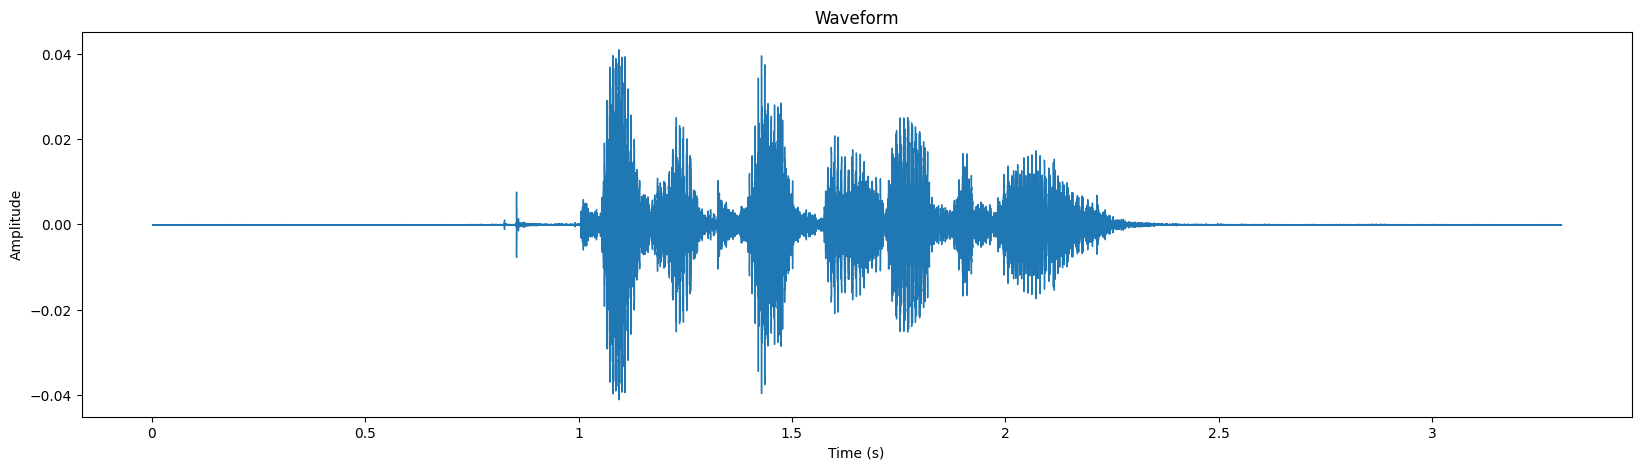

In [9]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

# Plot the waveform
plt.figure(figsize=(20, 5))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Plot the Spectrogram

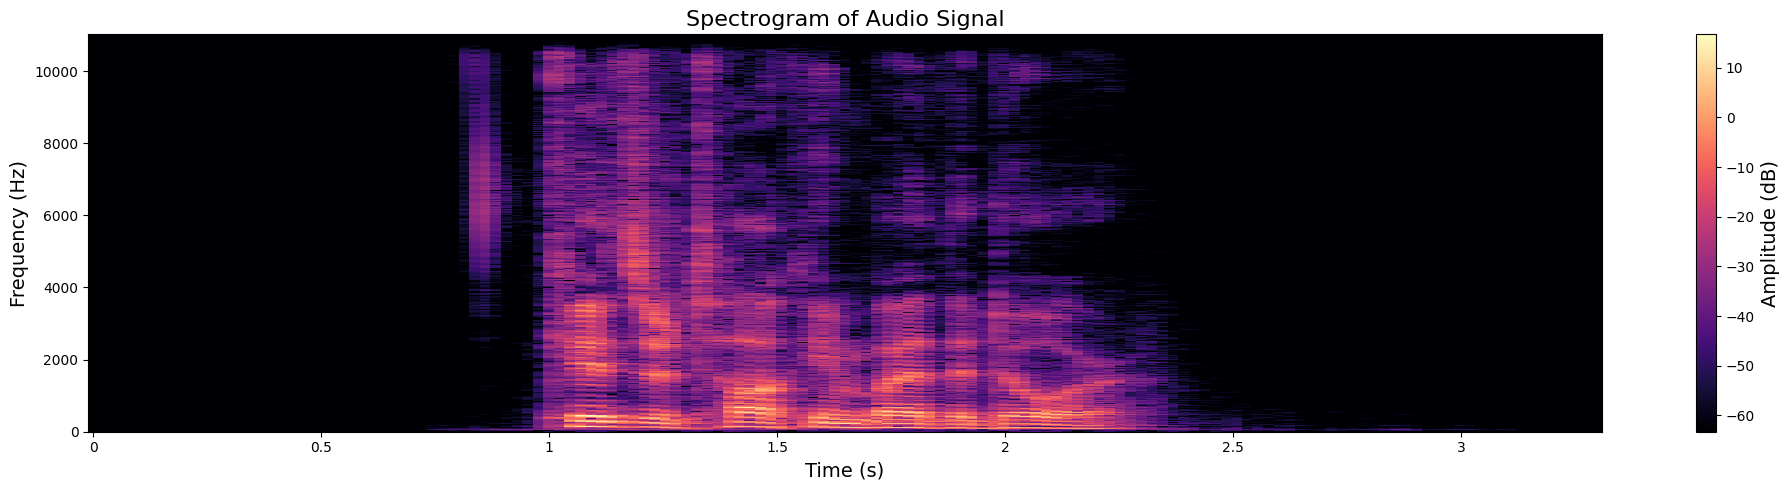

In [10]:
# Compute the Short-Time Fourier Transform (STFT)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))  # magniture of the audio frequencies in decibels

# Display the spectrogram
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

plt.title('Spectrogram of Audio Signal', fontsize=16)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Frequency (Hz)', fontsize=14)

cbar = plt.colorbar()
cbar.set_label('Amplitude (dB)', fontsize=14)
plt.tight_layout()
plt.show()

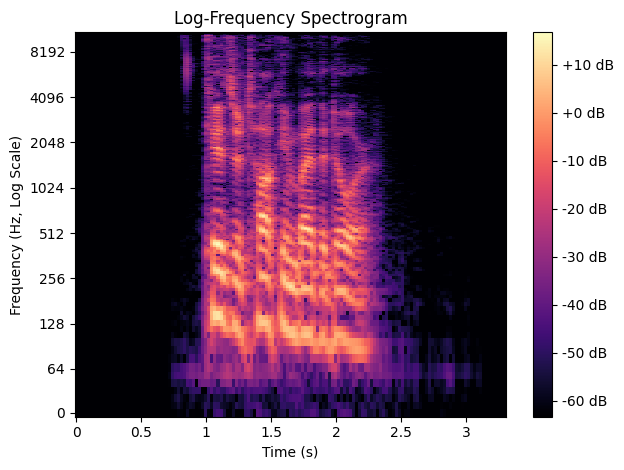

In [11]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')

plt.colorbar(format='%+2.0f dB')

plt.title('Log-Frequency Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz, Log Scale)')

plt.tight_layout()
plt.show()

# Feature Extraction

Zero Crossing Rates (ZCR)

In [12]:
zero_crossings = librosa.zero_crossings(x, pad=False)
zero_crossings.shape

(72838,)

In [13]:
print(sum(zero_crossings))

27334


Spectral Centroids

In [14]:
# Spectral Centroid represents the 'center of mass' of the spectrum of a sound signal.
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape

(143,)

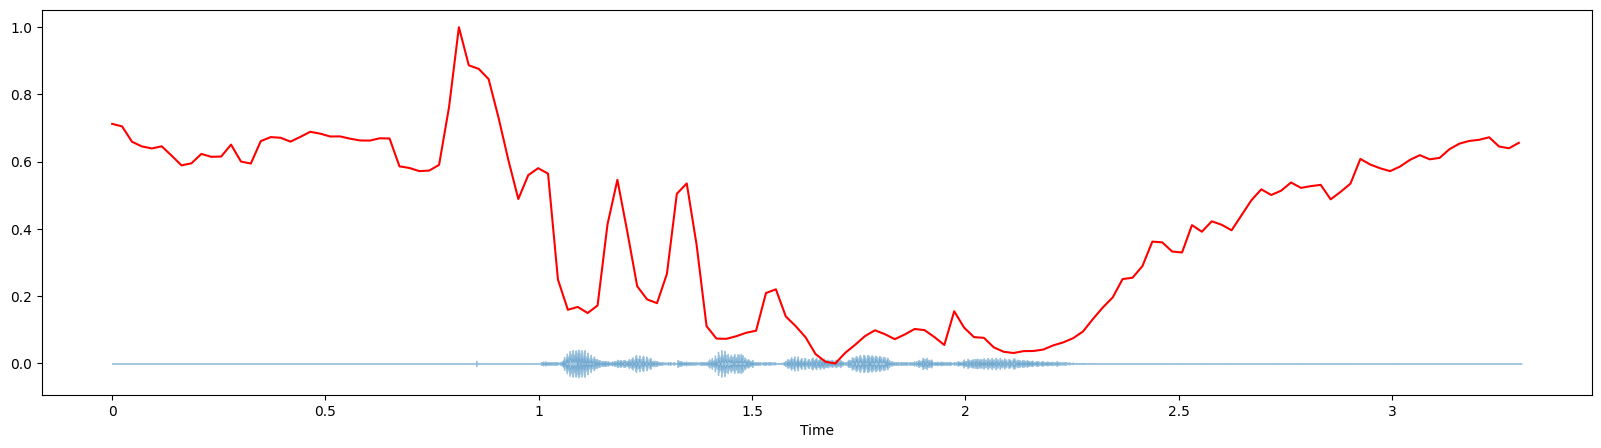

In [24]:
# Computing the time varible for visualization 
import sklearn.preprocessing


plt.figure(figsize=(20, 5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')



Spectral Rolloff

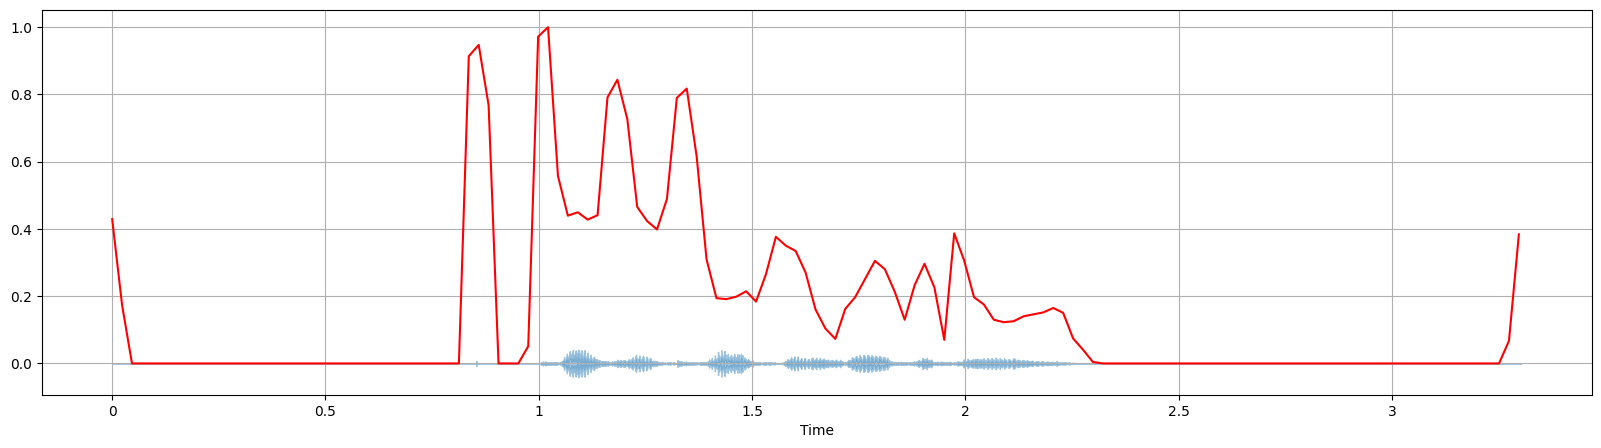

In [29]:
plt.figure(figsize=(20, 5))
spectral_rolloff = librosa.feature.spectral_rolloff(y=x + 0.01, sr=sr)[0]

librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()
plt.show()

Mel-Frequency Cepstral Cofficients (MFCCs)

(20, 143)


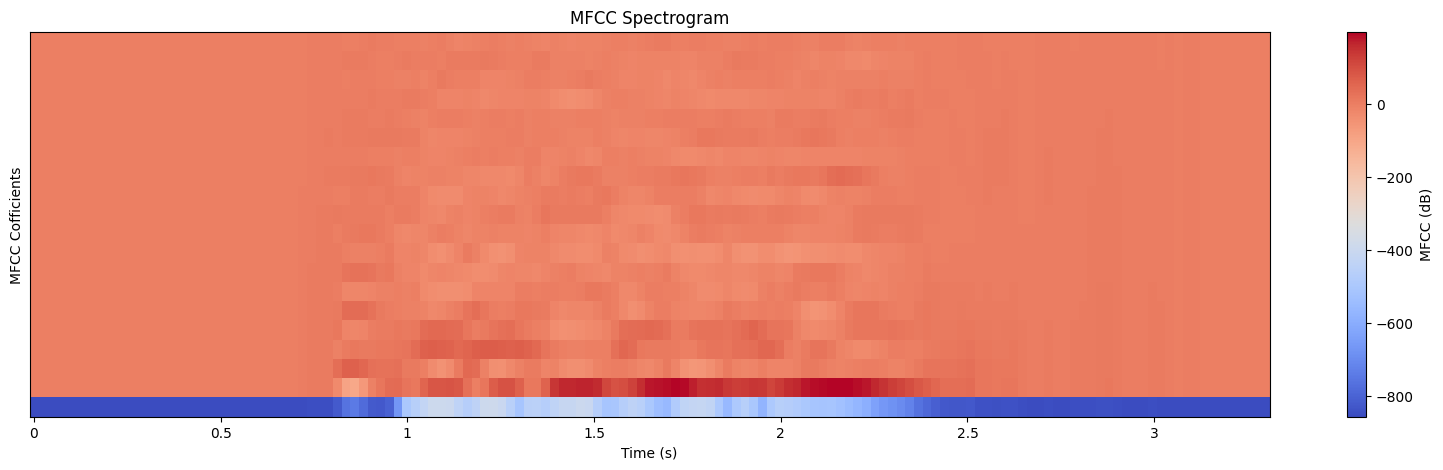

In [37]:
# MFCCs are representation of the short-term power spectrum of sound

plt.figure(figsize=(20, 5))
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

plt.colorbar(label='MFCC (dB)')
plt.title('MFCC Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Cofficients')

plt.show()


Feature Scaling        

[ 1.3338102e-08 -1.3338102e-08  0.0000000e+00  6.6690511e-09
  6.6690511e-09  0.0000000e+00  6.6690511e-09 -6.6690511e-09
  0.0000000e+00  1.0003577e-08  1.6672628e-09 -1.6672628e-09
  0.0000000e+00 -1.3338102e-08  3.3345255e-09  0.0000000e+00
  6.6690511e-09  0.0000000e+00  1.3338102e-08  0.0000000e+00]
[1.        1.        1.        1.        0.9999997 1.        1.
 1.        1.        1.0000001 1.        1.0000001 1.0000001 1.0000001
 1.        1.        1.0000001 1.        1.0000001 1.       ]


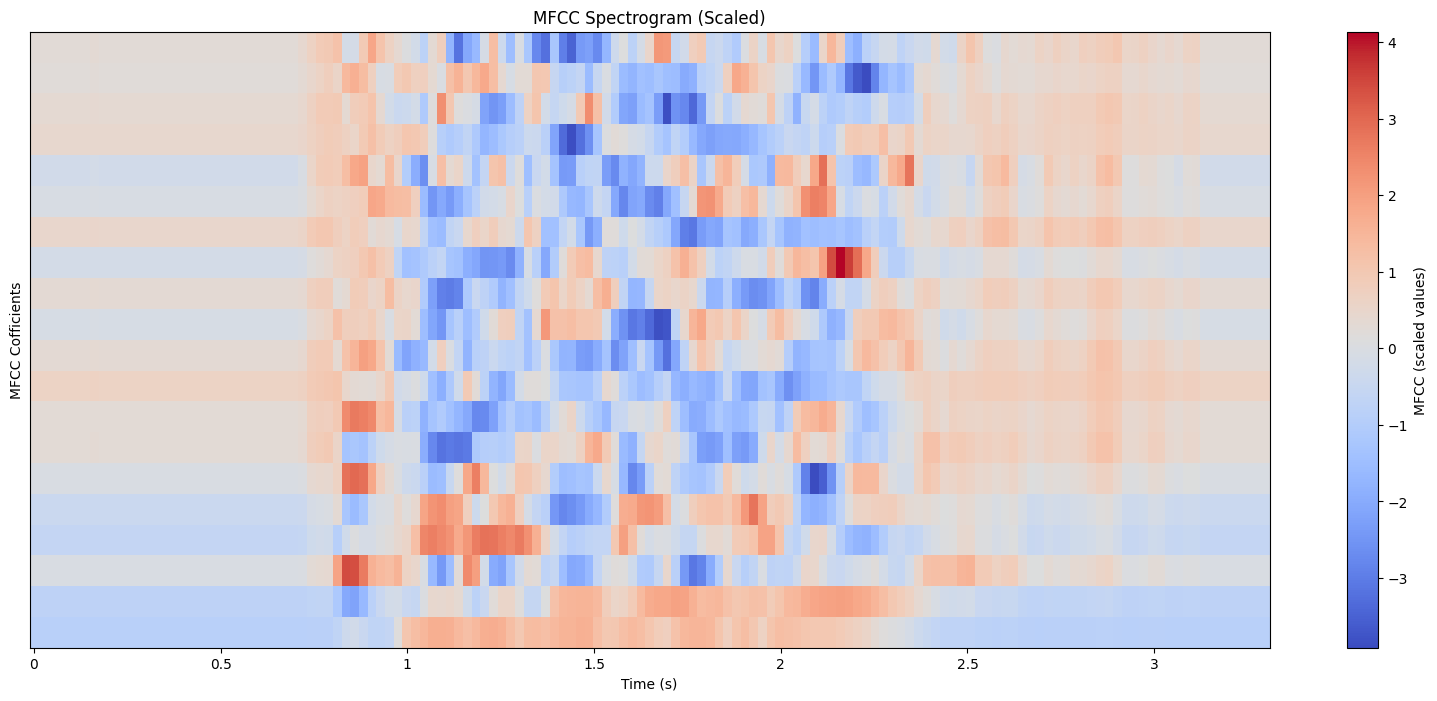

In [40]:
# this scales the mfccs to have a mean of 0 and a variance of 1 so that different features contribute equally to the training process

mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

plt.figure(figsize=(20, 8))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

plt.colorbar(label='MFCC (scaled values)')
plt.title('MFCC Spectrogram (Scaled)')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Cofficients')

plt.show()


Chroma Features / Chromogram 

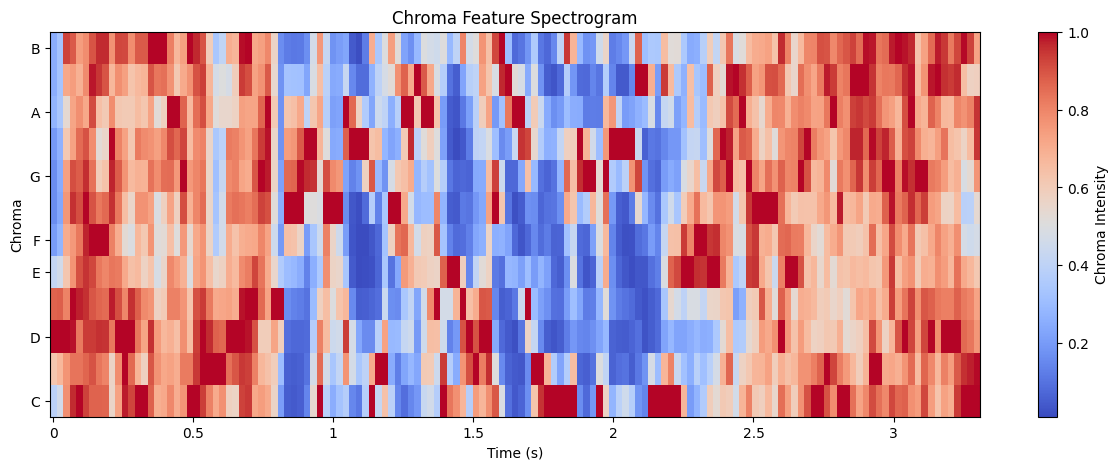

In [48]:
# The chroma feature captures the energy distribution across the 12 different pitch classes.

hop_length = 512
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)

plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

plt.colorbar(label='Chroma Intensity')
plt.title('Chroma Feature Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Chroma')

plt.show()

In [49]:
import numpy as np
def extractfeatures(x, sr):
    result = np.array([])

    # zero crossing rate - reperesents change in sign
    zcrate = np.mean(librosa.feature.zero_crossing_rate(y=x).T, axis=0)   # .T is for taking Transpose  
    result = np.hstack((result, zcrate))

    # MFCC - short-term power spectrum of sound
    mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sr).T, axis=0)
    result = np.hstack((result, mfcc))

    # Chroma - pitch content of the audio
    chroma = np.abs(librosa.stft(x))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=chroma, sr=sr).T, axis=0)
    result = np.hstack((result, chroma_stft))

    # Mel Spectrogram - representation of energy in different frequency bands using mel scale
    mel = np.mean(librosa.feature.melspectrogram(y=x, sr=sr).T, axis=0)
    result = np.hstack((result, mel))

    # Spectral Centroid - center of mass of the spectrum
    specc = np.mean(librosa.feature.spectral_centroid(y=x, sr=sr)[0])
    result = np.hstack((result, specc))

    # Spectral Rolloff - frequency below which a specific (85%) percentage of the total spectral energy lies
    specr = np.mean(librosa.feature.spectral_rolloff(y=x, sr=sr))
    result = np.hstack((result, specr))

    # Fourier Tempogram - capture tempo information in the frequency domain
    # tempo information - refers to speed or pace at which a piece of audio is performed, it represents how quickly or slowly the beats occur in the signal.
    fouriert = np.mean(librosa.feature.fourier_tempogram(y=x, sr=sr))
    result = np.hstack((result, fouriert))

    return result


extractfeatures(x, sr)

array([ 3.72712249e-01+0.j        , -6.97792603e+02+0.j        ,
        5.48900414e+01+0.j        ,  6.63465559e-01+0.j        ,
        1.24357862e+01+0.j        ,  7.73395157e+00+0.j        ,
        5.30750394e-01+0.j        , -3.21663094e+00+0.j        ,
       -3.15939426e+00+0.j        , -1.09775515e+01+0.j        ,
       -2.84871101e+00+0.j        ,  8.15297484e-01+0.j        ,
       -3.03706694e+00+0.j        ,  1.95544672e+00+0.j        ,
       -3.73566794e+00+0.j        ,  4.37700331e-01+0.j        ,
        7.82356679e-01+0.j        , -4.07142878e+00+0.j        ,
       -1.86077642e+00+0.j        , -1.32368994e+00+0.j        ,
       -9.20463324e-01+0.j        ,  7.47432590e-01+0.j        ,
        7.88211107e-01+0.j        ,  7.76624024e-01+0.j        ,
        7.83585608e-01+0.j        ,  7.52994895e-01+0.j        ,
        6.79756641e-01+0.j        ,  6.81204140e-01+0.j        ,
        7.25894749e-01+0.j        ,  7.53849030e-01+0.j        ,
        7.44567156e-01+0.